<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº5
#### Mathilde d'Hébrail





### Configuracion e inicio de la simulacion

In [158]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,10)
import matplotlib.pyplot as plt
import scipy.signal as sig
import warnings
warnings.filterwarnings('ignore')
import math
from scipy.stats import binom
import cmath

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
fig_font_size = 16
plt.rcParams.update({'font.size':fig_font_size})


# SNR = 3

### Creacion de 200 señales senoidales de 1000 muestreas:

In [159]:
a1 = 3
N = 1000
SNR = 10**(3/10)

omega0  = math.pi / 2
fr = []
for i in range(200):
    fr.append(np.random.uniform(-1/2, 1/2))

omega1 = []
for i in range(200):
    omega1.append(omega0 + fr[i] * 2*math.pi / N)

n=[]
for i in range(200):
    n.append(np.random.normal(0, np.sqrt((a1**2)/(2*SNR)), 1000))

x = []
for i in range(200):
    x.append([])
    for k in range(1000):
        x[i].append(a1 * math.sin(omega1[i] * k) + n[i][k])
        
x_matrice = np.array(x).transpose()

### Visualisacion del primero de los 200 señales

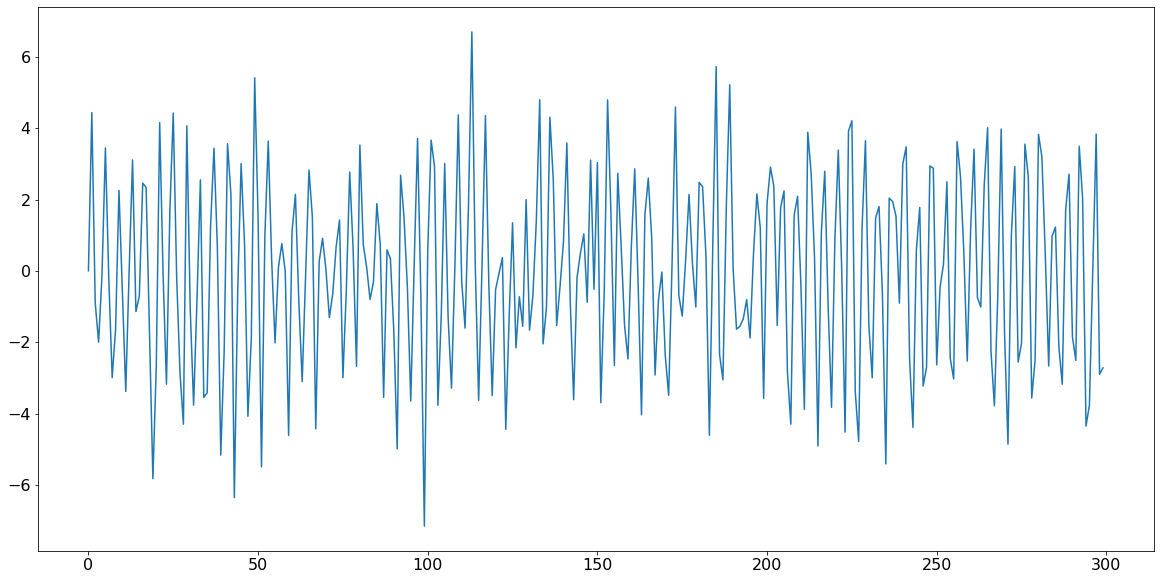

In [160]:
plt.figure(1)
plt.plot(x_matrice[:300, 1])
plt.show()

### Calculo y visualisacion de la FFT, puesta a escala

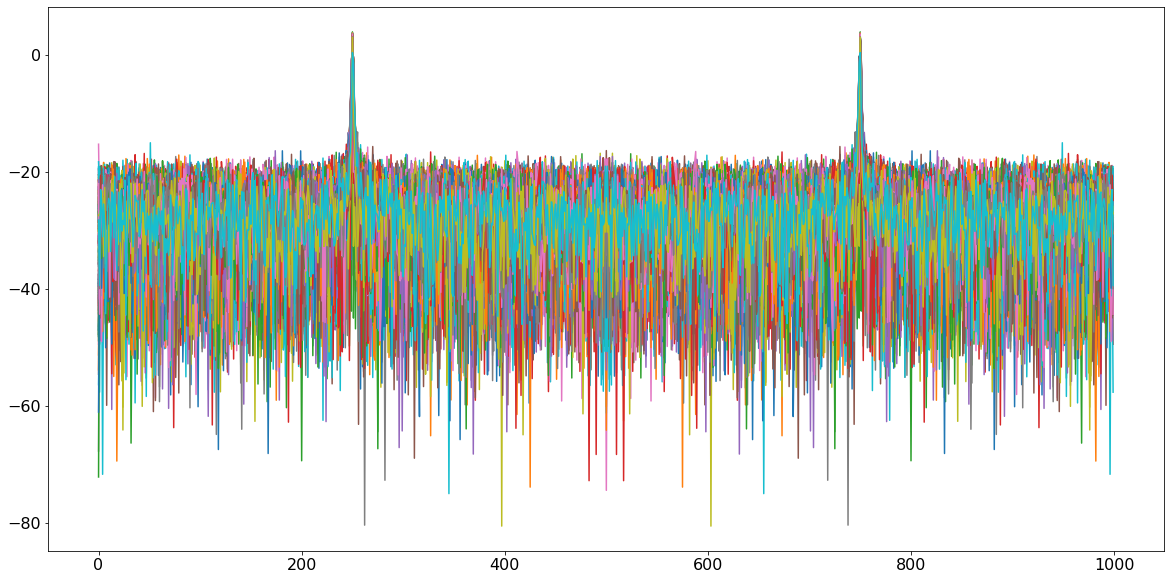

In [161]:
fft_matrice = (1/N) * np.fft.fft(x_matrice, axis = 0)

plt.figure(2)
plt.plot(20 * np.log10(abs(fft_matrice)))
plt.show()

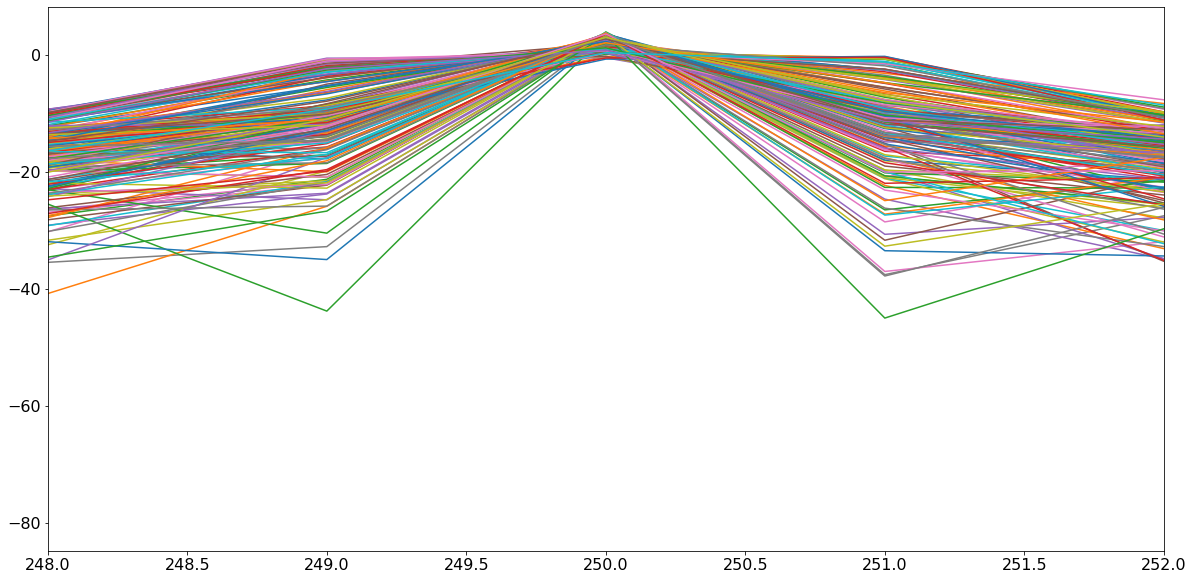

In [162]:
fft_matrice = (1/N) * np.fft.fft(x_matrice, axis = 0)

plt.figure(3)
plt.plot(20 * np.log10(abs(fft_matrice)))
plt.xlim(248, 252)
plt.show()

### Calculo y visualisacion del estimador a para un señal

media de la differencia entre -estimador-de-a1 y a1  0.03311069466196901
varienza del estimador de a1  0.1463420146288712


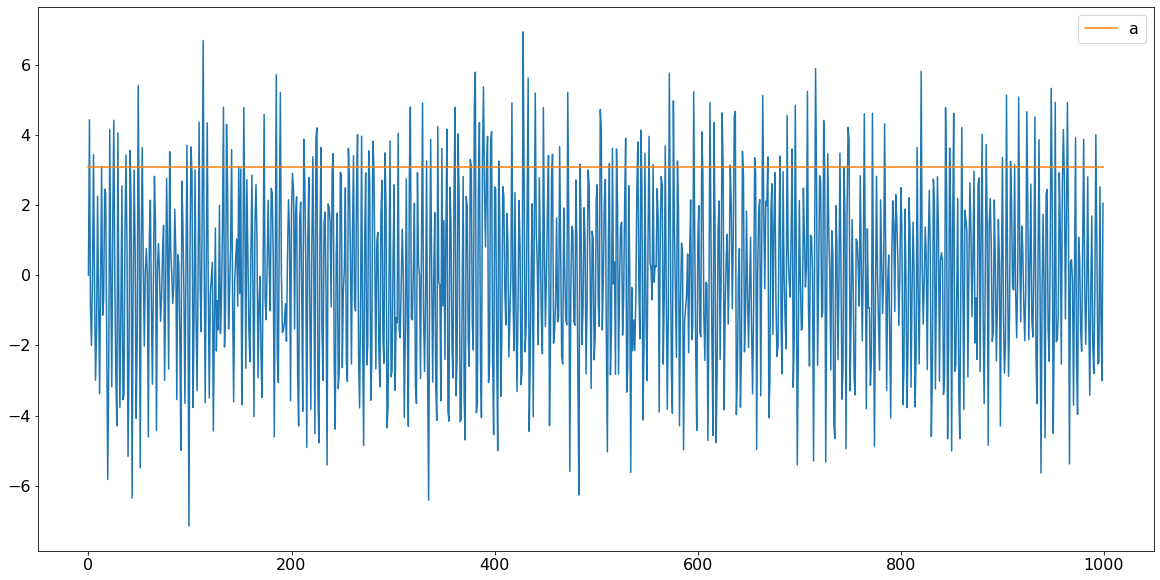

In [163]:
a = 2.3 * abs(fft_matrice[N//4, :])
mean_diff_a = np.mean(a - a1)
var_a1_est = np.mean(a**2) - np.mean(a)**2
print("media de la differencia entre -estimador-de-a1 y a1 ", mean_diff_a)
print("varienza del estimador de a1 ", var_a1_est)

estimador_a_matrice = [a[1] for i in range(1000)]

plt.figure(3)
plt.plot(x_matrice[:,1])
plt.plot(estimador_a_matrice, label = "a")
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

Podemos ver que la media de la differencia entre el estimador y a esta muy cerca de 0 y la varienza esta cerca de 0,15, que es pequeño. Es un buen estimador.

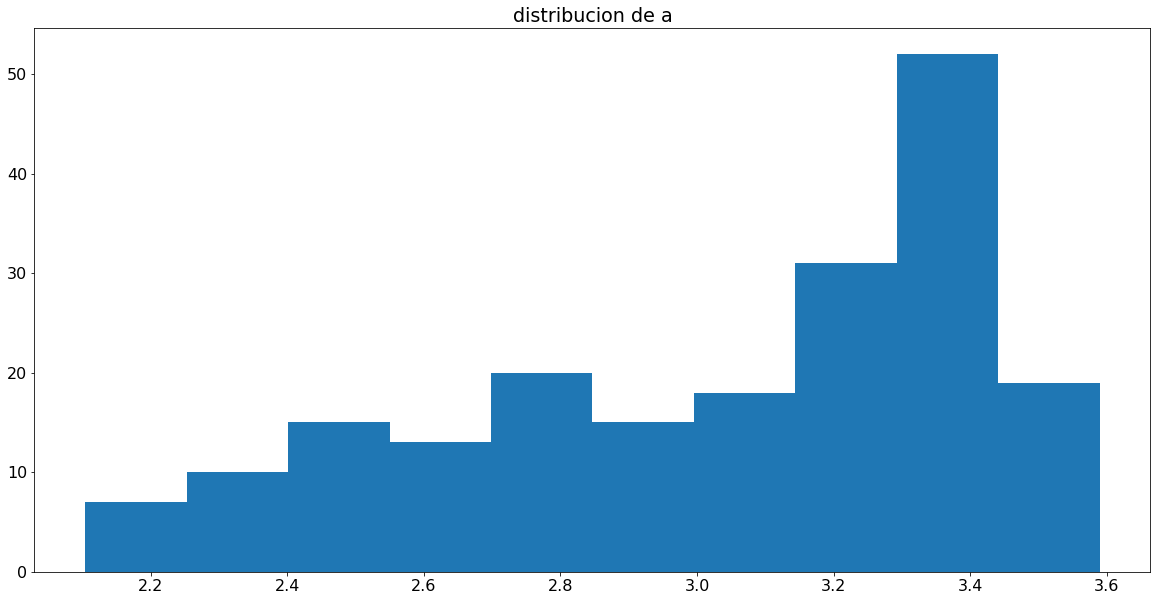

In [164]:
plt.figure(4)
bins = 10
plt.hist(a, bins=bins)
plt.title("distribucion de a")
plt.show()

### Calculo y analiza del estimador de Omega1

In [165]:
omega1_est = []
for i in range(200):
    omega1_est.append(np.argmax(np.abs(fft_matrice[:N//2, i])))

omega1 = np.array(omega1)
omega1_est = np.array(omega1_est)

diff_omega1_estimador = np.mean(omega1_est - omega1)

var_omega1_est = np.mean(omega1_est**2) - np.mean(omega1_est)**2
print("media de la differencia entre -estimador-de-omega1 y omega1 ", diff_omega1_estimador)
print("varienza del estimador de omega1 ", var_omega1_est)

media de la differencia entre -estimador-de-omega1 y omega1  248.44418626946717
varienza del estimador de omega1  0.014775000003282912


Podemos ver que la varianza del estimador de omega1 esta muy cerca de 0. Es un buen estimador.

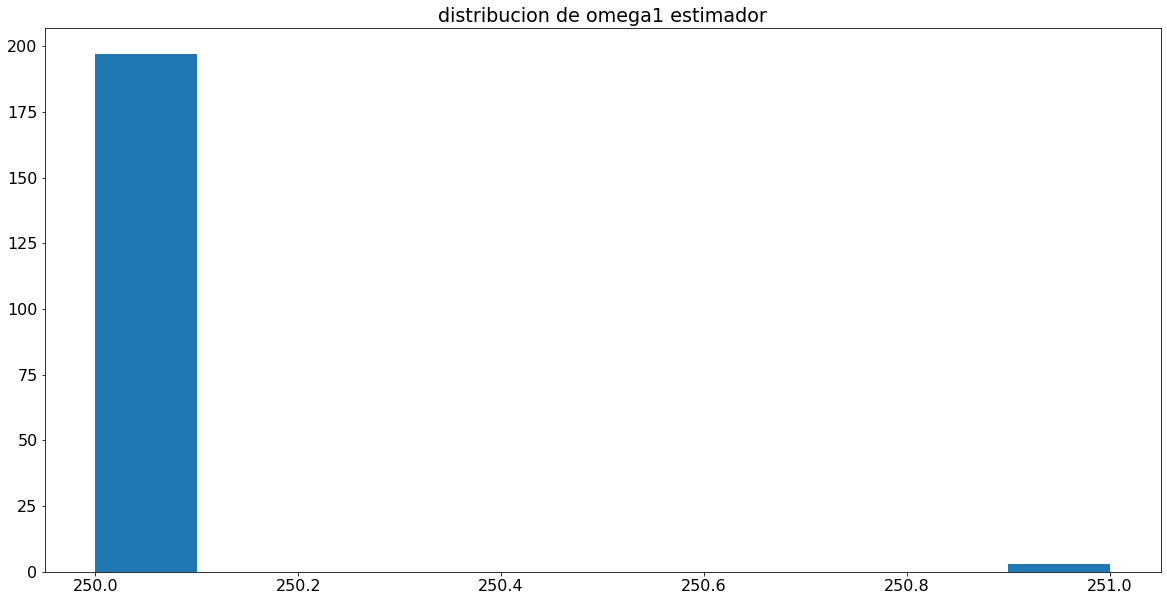

In [166]:
plt.figure(5)
bins = 10
plt.hist(omega1_est, bins=bins)
plt.title("distribucion de omega1 estimador")
plt.show()

# SNR = 10

### Creacion de 200 señales senoidales de 1000 muestreas:

In [167]:
%clear


a1 = 3
N = 1000
SNR = 10**(3/10)

omega0  = math.pi / 2
fr = []
for i in range(200):
    fr.append(np.random.uniform(-1/2, 1/2))

omega1 = []
for i in range(200):
    omega1.append(omega0 + fr[i] * 2*math.pi / N)

n=[]
for i in range(200):
    n.append(np.random.normal(0, np.sqrt((a1**2)/(2*SNR)), 1000))

x = []
for i in range(200):
    x.append([])
    for k in range(1000):
        x[i].append(a1 * math.sin(omega1[i] * k) + n[i][k])
        
x_matrice = np.array(x).transpose()

### Visualisacion del primero de los 200 señales

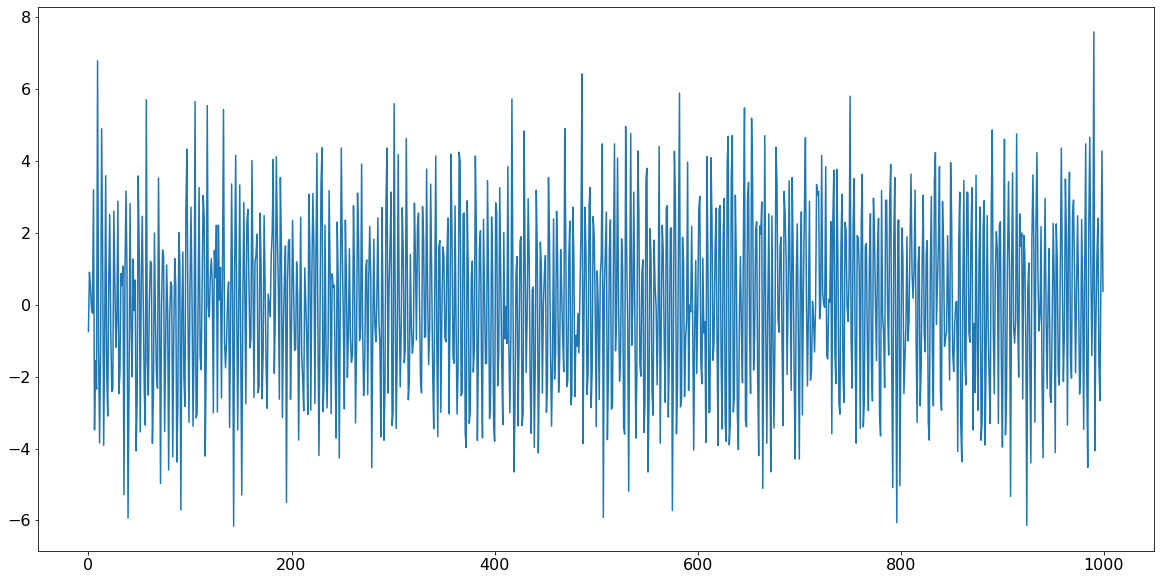

In [168]:
plt.figure(1)
plt.plot(x[1])
plt.show()

### Calculo y visualisacion de la FFT, puesta a escala

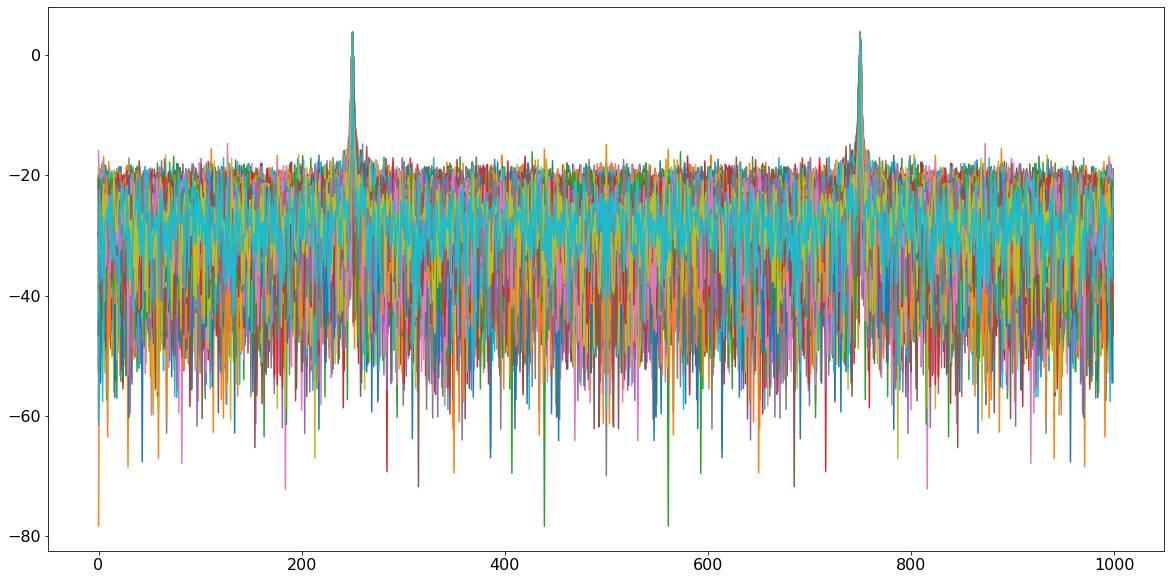

In [169]:
fft_matrice = (1/N) * np.fft.fft(x_matrice, axis = 0)

plt.figure(2)
plt.plot(20 * np.log10(abs(fft_matrice)))
plt.show()

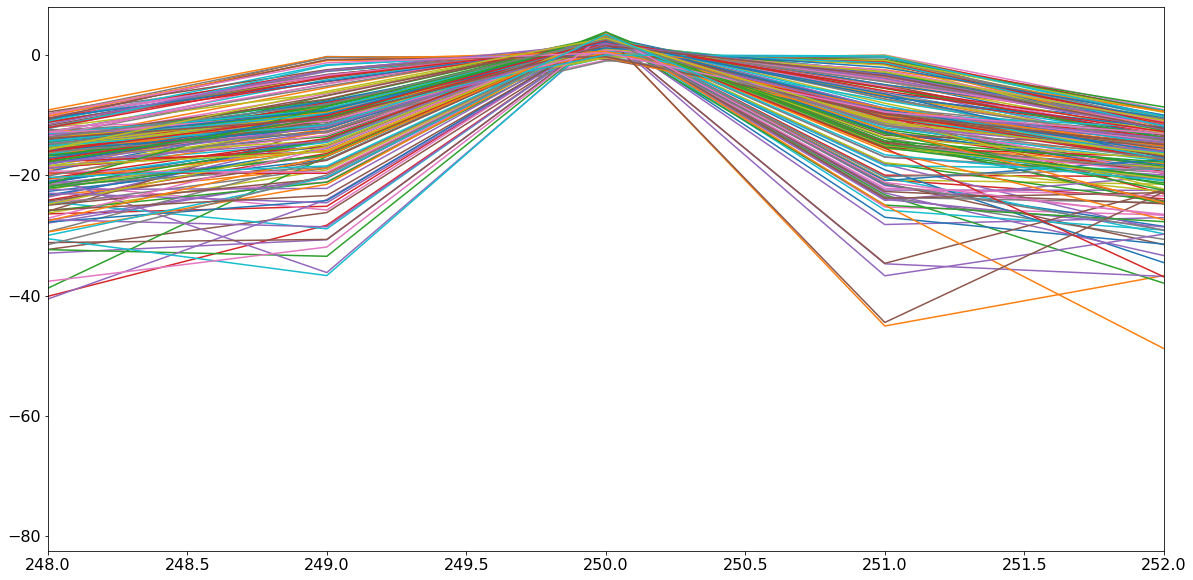

In [170]:
fft_matrice = (1/N) * np.fft.fft(x_matrice, axis = 0)

plt.figure(2)
plt.plot(20 * np.log10(abs(fft_matrice)))
plt.xlim(248, 252)
plt.show()

### Calculo y visualisacion del estimador a para un señal

media de la differencia entre -estimador-de-a1 y a1  -0.012188239365168186
varienza del estimador de a1  0.1601395497452085


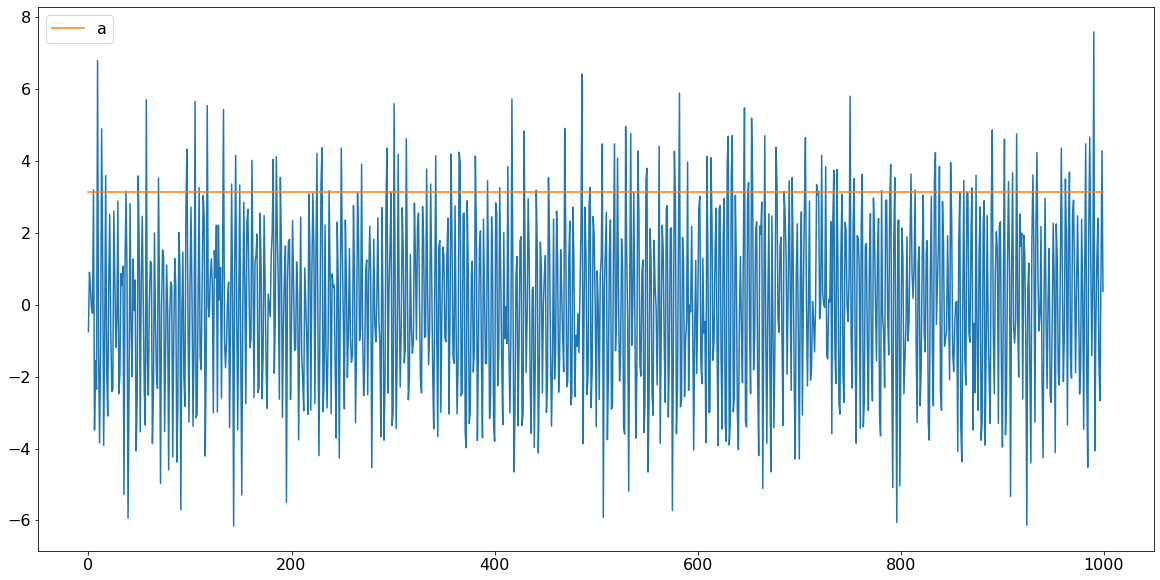

In [171]:
a = 2.3 * abs(fft_matrice[N//4, :])
mean_diff_a = np.mean(a - a1)
var_a1_est = np.mean(a**2) - np.mean(a)**2
print("media de la differencia entre -estimador-de-a1 y a1 ", mean_diff_a)
print("varienza del estimador de a1 ", var_a1_est)

estimador_a_matrice = [a[1] for i in range(1000)]

plt.figure(3)
plt.plot(x_matrice[:,1])
plt.plot(estimador_a_matrice, label = "a")
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

Podemos ver que la media de la differencia entre el estimador y a esta muy cerca de 0 y la varienza esta cerca de 0,15, que es pequeño. Es un buen estimador. Tiene menos precision con SNR = 10.

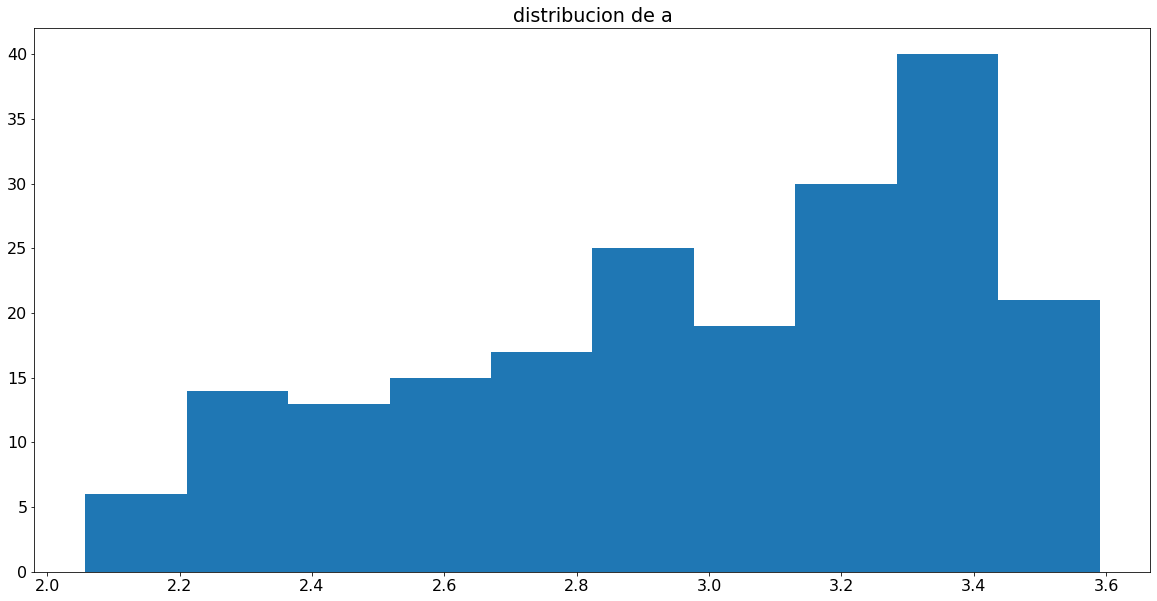

In [172]:
plt.figure(4)
bins = 10
plt.hist(a, bins=bins)
plt.title("distribucion de a")
plt.show()

### Calculo y analiza del estimador de Omega1

In [173]:
omega1_est = []
for i in range(200):
    omega1_est.append(np.argmax(np.abs(fft_matrice[:N//2, i])))

omega1 = np.array(omega1)
omega1_est = np.array(omega1_est)

diff_omega1_estimador = np.mean(omega1_est - omega1)

var_omega1_est = np.mean(omega1_est**2) - np.mean(omega1_est)**2
print("media de la differencia entre -estimador-de-omega1 y omega1 ", diff_omega1_estimador)
print("varienza del estimador de omega1 ", var_omega1_est)

media de la differencia entre -estimador-de-omega1 y omega1  248.4387992946992
varienza del estimador de omega1  0.01989999999932479


Podemos ver que la varianza del estimador de omega1 esta 0. Es un buen estimador. Tiene mas precision con SNR = 10.

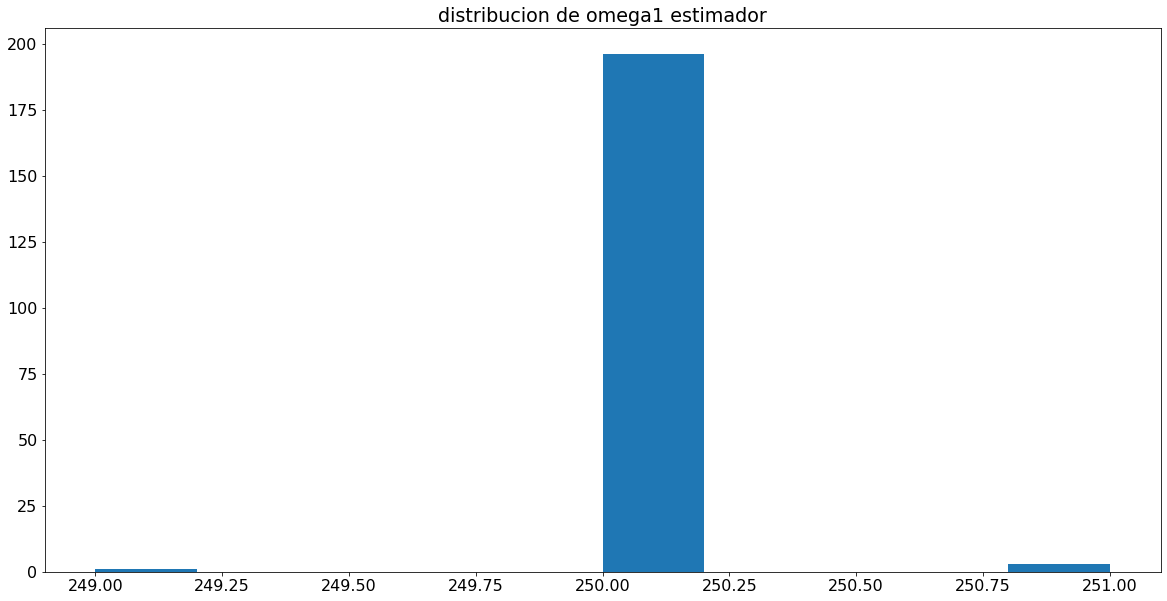

In [174]:
plt.figure(5)
bins = 10
plt.hist(omega1_est, bins=bins)
plt.title("distribucion de omega1 estimador")
plt.show()